# Table of Contents:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Explore data visually 
#### 4: Hypothesis
#### 5. Data prep for regression analysis
#### 6. Regression analysis

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#setting the path for data set import
path = r'/Users/davesmac/Desktop/Achievement 6'

In [5]:
df_routes = pd.read_excel(os.path.join(path, 'Data' , 'climbing_routes_clean.xlsx'))

In [6]:
df_routes.head()

,Unnamed: 0,Route_Name,Location,Area,Region,State,Avg Stars,Route_Type,Route_Subtype,Rating,Rating_Subtype,Pitches,Length,Latitude,Longitude,Coordinates,URL,Rating Category,Length Category
0,0,What's My Line?,Cochise Dome (What's My Line Dome) > East Stro...,Cochise Stronghold,Southern Arizona,Arizona,3.7,Trad,Aid,6,A0 R,3,400.0,31.92900,-109.98167,"('31.929', '-109.98167')",https://www.mountainproject.com/route/10573837...,Easy Route,Medium Route
1,1,Hanging Gardens,Gardener's Wall > McDowell Mountains > **Phoen...,**Phoenix Areas,Central Arizona,Arizona,3.3,Trad,None,6,NaN,2,NaN,33.68178,-111.80737,"('33.68178', '-111.80737')",https://www.mountainproject.com/route/10587937...,Easy Route,NaN
2,2,East Face,The Praying Monk > Camelback Mountain > **Phoe...,**Phoenix Areas,Central Arizona,Arizona,3.0,Sport,None,6,NaN,1,80.0,33.51450,-111.96180,"('33.5145', '-111.9618')",https://www.mountainproject.com/route/10580135...,Easy Route,Short Route
3,3,Southeast Arete,East Face > Baboquivari Peak > Southern Arizon...,Baboquivari Peak,Southern Arizona,Arizona,3.3,Trad,None,6,NaN,6,NaN,31.77129,-111.59357,"('31.77129', '-111.59357')",https://www.mountainproject.com/route/10614707...,Easy Route,NaN
4,4,Razor's Edge,The Hand > Northwest Pinnacles > Superstition ...,**Phoenix Areas,Central Arizona,Arizona,2.7,Trad,None,6,NaN,3,250.0,33.45235,-111.45936,"('33.45235', '-111.45936')",https://www.mountainproject.com/route/10580806...,Easy Route,Medium Route


In [8]:
df_routes.shape

(74686, 19)

## 2. Data Cleaning

#### Note- data cleaning has already been preformed. Will run some checks to make sure all looks good.


In [10]:
#Check missing values
df_routes.isnull().sum()

Unnamed: 0             0
Route_Name             2
Location               0
Area                1411
Region                 3
State                  0
Avg Stars              0
Route_Type             0
Route_Subtype       3823
Rating                 0
Rating_Subtype     22393
Pitches                0
Length              8336
Latitude               0
Longitude              0
Coordinates            0
URL                 9162
Rating Category        0
Length Category     8336
dtype: int64

#### Several categories are missing values, but most will not be important for analysis.  For example, area, route_subtype, and rating_subtype will probably not be needed for further analysis.  However, length and length category will be.  I am still working on filling missing values for the lenght category (which in turn will populate the length category column)

In [12]:
dups = df_routes.duplicated()

In [14]:
dups.shape #No duplicates

(74686,)

/Users/davesmac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

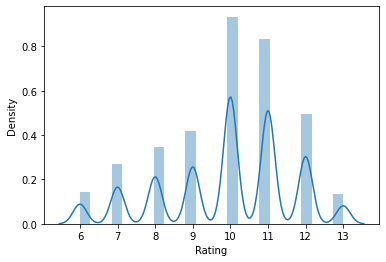

In [16]:
# Check for extreme values
sns.distplot(df_routes['Rating'], bins=25) # Shows extreme values- no extreme values

## 3. Explore Data Visually

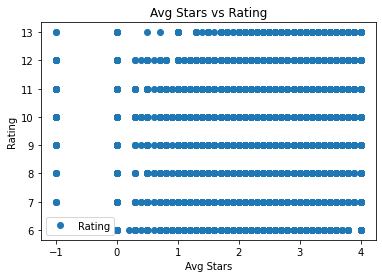

In [17]:
# Create a scatterplot to look at how the chosen variables plot against each other.

df_routes.plot(x = 'Avg Stars', y='Rating',style='o') 
plt.title('Avg Stars vs Rating')  
plt.xlabel('Avg Stars')  
plt.ylabel('Rating')  
plt.show()

In [18]:
#Don't include any routes with avg stars = 0
df_routes = df_routes[df_routes['Avg Stars'] >=1]

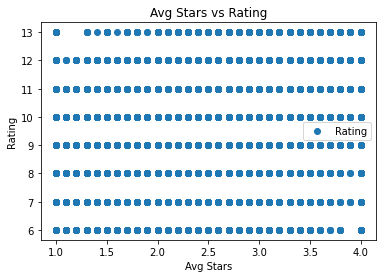

In [19]:
df_routes.plot(x = 'Avg Stars', y='Rating',style='o') 
plt.title('Avg Stars vs Rating')  
plt.xlabel('Avg Stars')  
plt.ylabel('Rating')  
plt.show()

#### This scatterplot is showing a very even distribution of rating by avg stars

## 4. Hypothesis: 

#### The higher the rating (difficulty) of a climb, the more stars it will typically receive. 

## 5. Data prep for regression analysis

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_routes['Avg Stars'].values.reshape(-1,1)
y = df_routes['Rating'].values.reshape(-1,1)

In [22]:
X

array([[3.7],
       [3.3],
       [3. ],
       ...,
       [1. ],
       [1. ],
       [1. ]])

In [23]:
y

array([[ 6],
       [ 6],
       [ 6],
       ...,
       [13],
       [13],
       [13]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 6. Regression Analysis

In [25]:
# Create a regression object.

regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

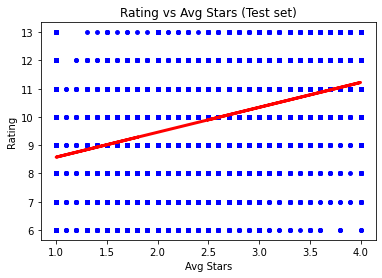

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating vs Avg Stars (Test set)')
plot_test.xlabel('Avg Stars')
plot_test.ylabel('Rating')
plot_test.show()

#### Based on my understanding of the data (and general climbing knowledge), the line is behaving as it should (a postive slope showing as routes get more difficult, they have a higher avg stars count).  However, the line doesn't really represent the layout of all the values.  I would think this is because my two variables are fairly constricted (ratings can only be one whole number value and avg star is typically broken up in 1/2 increments.  

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [30]:
# Print summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.88165523]]
Mean squared error:  2.4858793832452357
R2 score:  0.14411087166545755


#### The slope is what I expected (see above) and falls in line with my hypothesis.  The MSE is fairly small (at least I assume 2.48 is small), which would lead me to believe that the regression line passes fairly close to the observations and is a good fit.  However, the R2 score is VERY low, telling me that my model is not a very good fit.

In [31]:
y_predicted

array([[ 9.28202819],
       [ 9.10569714],
       [10.34001446],
       ...,
       [ 9.7228558 ],
       [10.07551789],
       [ 9.89918685]])

In [33]:
# df to compare y predicted vs y actual values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7,9.282028
1,10,9.105697
2,11,10.340014
3,10,9.811021
4,13,8.576704
5,13,9.458359
6,12,10.075518
7,10,9.987352
8,8,9.017532
9,10,10.251849


#### As stated, while the regression line resembles what I hypothesized, and the MSE  value is low (thus showing that the regression line passes close to the observations, the R2 score clearly demonstrates that the model is a poor fit. Also, by looking at the predicted vs actual y values, there is quite a bit of variance, showing that the model did not do a very good job at predicting avg stars based on rating.  

#### I believe that this data is inherently bias because both ratings and avg stars are essentially the opinions of mountain project users and thus subject to all the bias that comes with opinions. However, based on the number of users rating difficulty and quality of each route, I feel that there is enough data to compile an accurate average. This could also vary by route though- some routes may have been climbed/rated 1000's of times, while others just a handful.  


#### For my final report, I would like to run this model again with a different independent variable, such as State or Region to see if the model could predict where the highest quality routes are based on State/Region.